# Beyond gradient descent, vol. 1 
## Метод тяжёлого шарика и ускоренный метод Нестерова

## На прошлом семинаре

- Метод сопряжённых градиентов
- Теоремы сходимости
- Расширения для задач с произвольной гладкой выпуклой функцией
- Концепция рестартов
- Эксперименты

## Оценки снизу: напоминание

- Фиксируем класс функций $\mathcal{F}$
- Фиксируем класс методов оптимизации $\mathcal{M}$
- Ищем настолько плохую функцию из класса $\mathcal{F}$, что любой метод из класса $\mathcal{M}$ сходится не лучше, чем некоторая оценка
- Такая оценка называется оценкой снизу

## Пример
### Фиксируем класс методов

Рассмотрим такие методы, что

$$
x_{k+1} = x_0 + \texttt{span}\{f'(x_0), \ldots, f'(x_k)\}
$$

- Далее в рамках этого семинара для краткости только такие методы будем называть методами первого порядка
- Весь последующий анализ **НЕ** применим, если 

$$
x_{k+1} = x_0 + G(f'(x_0), \ldots, f'(x_k)),
$$

где $G$ - некоторая нелинейная функция

-  С такими методами мы познакомимся ближе к середине семестра

### Фиксируем класс функций
#### Выпуклые функции с липшицевым градиентом

**Теорема.** Существует выпуклая функция с Липшицевым градиентом, такая что

$$
f(x_t) - f^* \geq \frac{3L\|x_0 - x^*\|_2^2}{32(t+1)^2},
$$

где $x_k = x_0 + \texttt{span}\{f'(x_0), \ldots, f'(x_{k-1})\}$, $1 \leq k \leq t$

Привести пример такой функции и доказать эту теорему Вам надо в домашнем задании.

#### Сильно выпуклые функции с липшицевым градиентом

**Теорема.** Существует сильно выпуклая функция с Липшицевым градиентом, такая что

$$
f(x_t) - f^* \geq \frac{\mu}{2}\left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^{2t}\|x_0 - x^*\|_2^2,
$$

где $\kappa = \frac{L}{\mu}$ и $x_k = x_0 + \texttt{span}\{f'(x_0), \ldots, f'(x_{k-1})\}$, $1 \leq k \leq t$


Привести пример такой функции и доказать эту теорему Вам надо в домашнем задании.

## Оценки сходимости известных методов
### Оценки сходимости для градиентного спуска: напоминание

- Пусть
    - $f(x)$ дифференцируема на $\mathbb{R}^n$
    - $f(x)$ выпукла 
    - $f'(x)$ удовлетворяет условию Липшица с константой $L$
    - $\alpha = \dfrac{1}{L}$

    Тогда 

    $$
    f(x_k) - f^* \leq \dfrac{2L \| x_0 - x^*\|^2_2}{k+4}
    $$
    
- Пусть
    - $f(x)$ дифференцируема на $\mathbb{R}^n$, 
    - градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
    - $f(x)$ является сильно выпуклой с константой $\mu$
    - $\alpha = \dfrac{2}{\mu + L}$

    Тогда для градиентного спуска выполнено:

    $$
    \| x_k - x^* \|_2 \leq \left( \dfrac{\kappa - 1}{\kappa + 1} \right)^k \|x_0 - x^*\|_2
    $$ 
    
    $$f(x_k) - f^* \leq \dfrac{L}{2} \left( \dfrac{\kappa - 1}{\kappa + 1} \right)^{2k} \| x_0 - x^*\|^2_2,
    $$

    где $\kappa = \frac{L}{\mu}$

### Оценки сходимости для метода сопряжённых градиентов: напоминание

Для сильно выпуклой квадратичной функции

$$
f(x) = \frac{1}{2}x^{\top}Ax - b^{\top}x
$$ 

и метода сопряжённых градиентов справедлива следующая оценка сходимости 


$$
2 (f_k - f^*) = \| x_{k} - x^* \|_A \leq 2\left( \dfrac{\sqrt{\kappa(A)} - 1}{\sqrt{\kappa(A)} + 1} \right)^k \|x_0 - x^*\|_A,
$$

где $\kappa(A) = \frac{\lambda_1(A)}{\lambda_n(A)} = \frac{L}{\mu}$ - число обусловленности матрицы $A$, $\lambda_1(A) \geq ... \geq \lambda_n(A) > 0$ - собственные значения матрицы $A$

## Can we do better?

Существует ли метод, который сходится в соответствии с нижними оценками для
- произвольной сильно выпуклой функции с липшицевым градиентом (не только квадратичной)?
- произвольной выпуклой функции с липшицевым градиентом?

## Метод тяжёлого шарика (heavy-ball method)

- [Предложен](http://www.mathnet.ru/links/453550bb5a36d7ff295e9a39c3333607/zvmmf7713.pdf) в 1964 г. [Б.Т. Поляком](https://scholar.google.ru/citations?user=Zhlib28AAAAJ&hl=ru&oi=ao)
<img src="./polyak.jpeg">
- Для квадратичной целевой функции зигзагообразное поведение градиентного спуска обусловлено неоднородностью направлений
- Давайте учитывать предыдущие направления для поиска новой точки
- Метод тяжёлого шарика

$$
x_{k+1} = x_k - \alpha_k f'(x_k) + {\color{red}{\beta_k(x_k - x_{k-1})}}
$$

- Помимо параметра шага вдоль антиградиента $\alpha_k$ появился ещё один параметр $\beta_k$

### Геометрическая интерпретация метода тяжёлого шарика

Картинка [отсюда](https://www.princeton.edu/~yc5/ele538_optimization/lectures/accelerated_gradient.pdf) 
<img src="./heavy_ball.png" width=600 align="center">

### Теорема сходимости

Пусть $f$ сильно выпукла с Липшицевым градиентом. Тогда для 

$$
\alpha_k = \frac{4}{(\sqrt{L} + \sqrt{\mu})^2}
$$ 

и 

$$
\beta_k = \max(|1 - \sqrt{\alpha_k L}|^2, |1 - \sqrt{\alpha_k \mu}|^2)
$$ 

справедлива следующая оценка сходимости

$$ 
\left\| \begin{bmatrix} x_{k+1} - x^* \\ x_k - x^* \end{bmatrix} \right\|_2
\leq 
\left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^k \left \|
\begin{bmatrix} x_1 - x^* \\ x_0 - x^* \end{bmatrix}
\right \|_2
$$

- Совпадает с оценкой снизу для методов первого порядка!
- Оптимальные параметры $\alpha_k$ и $\beta_k$ определяются через **неизвестные** константы $L$ и $\mu$

### Схема доказательства

- Перепишем метод как 

\begin{align*}
\begin{bmatrix} x_{k+1}\\ x_k \end{bmatrix} = \begin{bmatrix} (1 + \beta_k)I & -\beta_k I\\ I & 0 \end{bmatrix} \begin{bmatrix} x_k\\ x_{k-1} \end{bmatrix} + \begin{bmatrix} -\alpha_k f'(x_k)\\ 0 \end{bmatrix}
\end{align*}

- Используем теорему из анализа

\begin{align*}
\begin{bmatrix} x_{k+1} - x^*\\ x_k - x^* \end{bmatrix} = \underbrace{ \begin{bmatrix} (1 + \beta_k)I - \alpha_k \int_0^1 f''(x(\tau))d\tau & -\beta_k I\\ I & 0 \end{bmatrix}}_{=A_k}\begin{bmatrix} x_k - x^*\\ x_{k-1} - x^*\end{bmatrix},
\end{align*}

где $x(\tau) = x_k + \tau(x^* - x_k) $
- Сходимость зависит от спектрального радиуса матрицы итераций $A_k$

- Получим оценку на спектр $A_k$

$$
A_k = \begin{bmatrix} (1 + \beta_k)I - \alpha_k A(x_k) & -\beta_k I \\ I & 0 \end{bmatrix}
$$

- Пусть $A(x_k) = U\Lambda(x_k) U^{\top}$, поскольку гессиан - симметричная матрица, тогда

$$
\begin{bmatrix} U^{\top} & 0 \\ 0 & U^{\top} \end{bmatrix} \begin{bmatrix} (1 + \beta_k)I - \alpha_k A(x_k) & -\beta_k I \\ I & 0 \end{bmatrix} \begin{bmatrix} U & 0\\ 0 & U \end{bmatrix} = \begin{bmatrix} (1 + \beta_k)I - \alpha_k \Lambda(x_k) & -\beta_k I \\ I & 0 \end{bmatrix} = \hat{A}_k
$$

- Ортогональное преобразование не меняет спектральный радиус матрицы
- Далее сделаем перестановку строк и столбцов так, чтобы 

$$
\hat{A}_k \simeq \mathrm{diag}(T_1, \ldots, T_n),
$$

где $T_i = \begin{bmatrix} 1 + \beta_k - \alpha_k \lambda_i & -\beta_k \\ 1 & 0 \end{bmatrix}$ и $\simeq$ обозначает равенство спектральных радиусов поскольку матрица перестановки является ортогональной

- Покажем как сделать такую перестановку на примере матрицы $4 \times 4$

$$ 
\begin{bmatrix}a & 0 & c & 0 \\ 0 & b & 0 & c \\ 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \end{bmatrix} \rightarrow \begin{bmatrix}a & 0 & c & 0 \\ 1 & 0 & 0 & 0 \\ 0 & b & 0 & c \\ 0 & 1 & 0 & 0 \end{bmatrix} \to \begin{bmatrix}a & c & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & b & c \\ 0 & 0 & 1 & 0 \end{bmatrix}
$$

- Свели задачу к оценке спектрального радиуса блочно-диагональной матрицы $\hat{A}_k$


- $\rho(\hat{A}_k) = \max\limits_{i=1,\ldots,n} \{ |\lambda_1(T_i)|, |\lambda_2(T_i)|\} $
- Характеристическое уравнение для $T_i$

$$
\beta_k - u (1 + \beta_k - \alpha_k \lambda_i - u) = 0 \quad u^2 - u(1 + \beta_k - \alpha_k\lambda_i) + \beta_k = 0
$$
- Дальнейшее изучение распределения корней и их границ даёт оценку из условия теоремы

### Эксперименты

### Тестовая задача 1

$$
f(x) = \frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x,
$$

где матрица $A$ плохо обусловлена

In [2]:
import liboptpy.base_optimizer as base
import numpy as np
import liboptpy.unconstr_solvers.fo as fo
import liboptpy.step_size as ss

class HeavyBall(base.LineSearchOptimizer):
    def __init__(self, f, grad, step_size, beta, **kwargs):
        super().__init__(f, grad, step_size, **kwargs)
        self._beta = beta
    
    def get_direction(self, x):
        self._current_grad = self._grad(x)
        return -self._current_grad

    def _f_update_x_next(self, x, alpha, h):
        if len(self.convergence) < 2:
            return x + alpha * h
        else:
            return x + alpha * h + self._beta * (x - self.convergence[-2])
    
    def get_stepsize(self):
        return self._step_size.get_stepsize(self._grad_mem[-1], self.convergence[-1], len(self.convergence))

In [31]:
np.random.seed(42)
n = 20
A = np.random.randn(n, n)
A = A.T.dot(A)
x_true = np.random.randn(n)
b = A.dot(x_true)
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad = lambda x: A.dot(x) - b
A_eigvals = np.linalg.eigvalsh(A)
L = np.max(A_eigvals)
mu = np.min(A_eigvals)
print(L, mu)
print("Condition number = {}".format(L / mu))
alpha_opt = 4 / (np.sqrt(L) + np.sqrt(mu))**2 
beta_opt = np.maximum((1 - np.sqrt(alpha_opt * L))**2, 
                      (1 - np.sqrt(alpha_opt * mu))**2)
print(alpha_opt, beta_opt)
beta_test = 0.95

54.636484491885916 0.02002751288267095
Condition number = 2728.0713692193303
0.07048629085801521 0.9262674012263596


In [35]:
methods = {
    "GD fixed": fo.GradientDescent(f, grad, ss.ConstantStepSize(1 / L)),
    "GD Armijo": fo.GradientDescent(f, grad, 
            ss.Backtracking("Armijo", rho=0.5, beta=0.1, init_alpha=1.)),
    r"HB, $\beta = {}$".format(beta_test): HeavyBall(f, grad, ss.ConstantStepSize(1 / L), beta=beta_test),
    "HB optimal": HeavyBall(f, grad, ss.ConstantStepSize(alpha_opt), beta = beta_opt),
    "CG": fo.ConjugateGradientQuad(A, b)
}
x0 = np.random.randn(n)
max_iter = 1500
tol = 1e-6

In [36]:
for m in methods:
    _ = methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

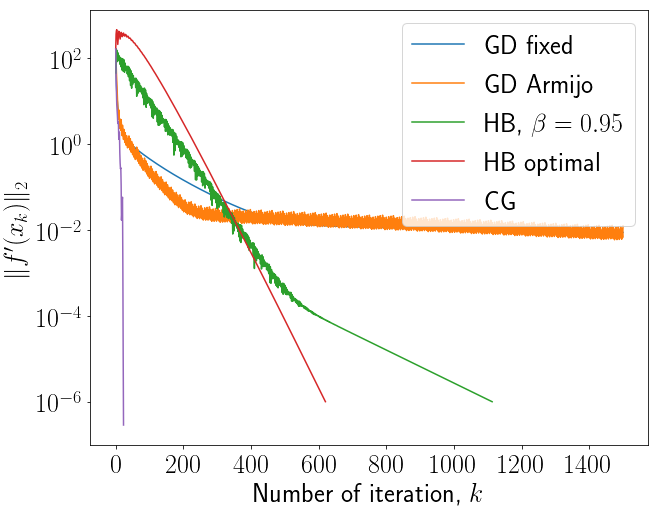

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)

figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [38]:
for m in methods:
    print(m)
    %timeit methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

GD fixed
25.6 ms ± 992 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
GD Armijo
216 ms ± 9.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
HB, $\beta = 0.95$
21.3 ms ± 959 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
HB optimal
11.2 ms ± 82.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
CG
821 µs ± 4.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Тестовая задача 2

$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum_{i = 1}^n \log (1 - x^2_i) \to \min_x
$$

In [125]:
n = 100
m = 200
x0 = np.zeros(n)
A = np.random.rand(n, m)

f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
grad = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), \
                          axis=1) + 2 * x / (1 - np.power(x, 2))

In [132]:
alpha_test = 1e-3
beta_test = 0.9

methods = {
    r"GD, $\alpha_k = {}$".format(alpha_test): fo.GradientDescent(f, grad, ss.ConstantStepSize(alpha_test)),
    "GD Armijo": fo.GradientDescent(f, grad, 
            ss.Backtracking("Armijo", rho=0.7, beta=0.1, init_alpha=1.)),
    r"HB, $\beta = {}$".format(beta_test): HeavyBall(f, grad, ss.ConstantStepSize(alpha_test), beta=beta_test),
    "CG FR": fo.ConjugateGradientFR(f, grad, 
            ss.Backtracking("Armijo", rho=0.7, beta=0.001, init_alpha=1.))
}
# x0 = np.random.rand(n)
x0 = np.zeros(n)
max_iter = 400
tol = 1e-5

In [133]:
for m in methods:
    print(m)
    _ = methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

GD, $\alpha_k = 0.001$
GD Armijo
HB, $\beta = 0.9$


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


CG FR


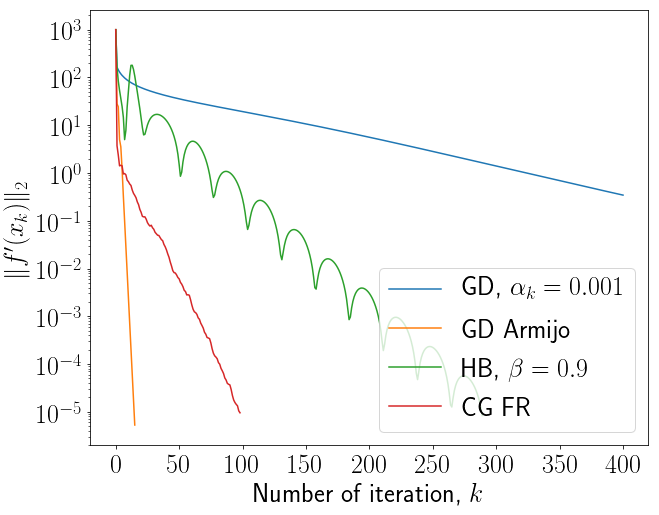

In [134]:
figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [135]:
for m in methods:
    print(m)
    %timeit methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

GD, $\alpha_k = 0.001$
79.6 ms ± 4.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
GD Armijo


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


14.8 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
HB, $\beta = 0.9$
57.9 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
CG FR


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


107 ms ± 4.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Главное про метод тяжёлого шарика

- Двухшаговый метод
- Не обязательно монотонный
- Параметры зависят от неизвестных констант
- Решает проблему осцилляций для плохо обусловленных задач
- Сходимость для сильно выпуклых фукнкций совпадает с оптимальной оценкой

## Ускоренный метод Нестерова

-  [Предложен](http://vsokolov.org/courses/750/files/nesterov.pdf) в 1983 г. [Ю.Е. Нестеровым](https://scholar.google.ru/citations?user=DJ8Ep8YAAAAJ&hl=ru&oi=ao)
<img src="./nesterov.jpeg">
- Одна из возможных форм записи 

\begin{equation*}
\begin{split}
& y_0 = x_0 \\
& x_{k+1} = y_k - \alpha_k f'(y_k)\\
& y_{k+1} = x_{k+1} + \frac{k}{k + 3} (x_{k+1} - x_k)
\end{split}
\end{equation*}

- Сравните с методом тяжёлого шарика
- Tакже не обязательно монотонен
- Для любителей геометрии есть альтернативный метод под названием [geometric descent](https://arxiv.org/pdf/1506.08187.pdf) с такой же скоростью сходимости 

### Геометрическая интерпретация ускоренного метода Нестерова

<img src="nesterov_plot.png" width=600>

## Адаптивный выбор константы $L$

## Эксперименты

## Резюме

- Нижние оценки для методов первого порядка
- Метод тяжёлого шарика
- Ускоренный метод Нестерова
- Поиск константы Липшица $L$ градиента